<a href="https://colab.research.google.com/github/donosonahuel/tendencias-historica-videojuegos/blob/main/An%C3%A1lisis_de_Tendencias_y_Ventas_Hist%C3%B3ricas(Videojuegos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📂 Adquisición y Comprensión del Dataset

## Importando biblioteca y archivo

In [36]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd

In [37]:
df_video_games_sales = pd.read_csv('/content/vgsales.csv')

## Inspección del DataSet

In [38]:
df_video_games_sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [39]:
df_video_games_sales.info() # Se puede identificar que falta datos en "Year" y "Publisher", y cambiar los objetos de "Name", "Platform", "Genre", "Year" y "Publisher" a string.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [40]:
df_video_games_sales.isnull().sum() # Se obtuvo la cantidad exacta de nulos.

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


# 🧼 Limpieza y Preparación de Datos (Data Wrangling)

## Rellenar los espacios nulos

In [41]:
# Imputacion de datos en la columna "Publisher"
df_video_games_sales['Publisher'] = df_video_games_sales['Publisher'].fillna('Unknown')

In [42]:
# Encontrar la media de los años en la columna "Year"
media_year = df_video_games_sales['Year'].mean()

# Imputación de datos en la columna "Year"
df_video_games_sales['Year'] = df_video_games_sales['Year'].fillna(media_year).round(0).astype(int)

# La media calculada en la columna 'Year' es 2006.4064433147546 redondeando el resultado a un tipo entero
# Haciendo esto minimiza la distorsion y mantiene la tendencia central

In [43]:
df_video_games_sales.isnull().sum() # Ya se han rellenado todos los campos

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Aplicar los tipos correctos de datos

In [44]:
# Todo la información en minuscula y el tipo de dato en String
df_video_games_sales['Name'] = df_video_games_sales['Name'].astype('string').str.lower()
df_video_games_sales['Platform'] = df_video_games_sales['Platform'].astype('string').str.lower()
df_video_games_sales['Genre'] = df_video_games_sales['Genre'].astype('string').str.lower()
df_video_games_sales['Publisher'] = df_video_games_sales['Publisher'].astype('string').str.lower()

In [45]:
# Todo la información en tipo numero entero
df_video_games_sales['Year'] = df_video_games_sales['Year'].astype(int)

In [46]:
# Visualizacion de la tabla
df_video_games_sales.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8464,8466,mobile suit gundam: extreme vs force,psv,2015,action,namco bandai games,0.00,0.00,0.16,0.00,0.16
7433,7435,spider-man: web of shadows,ps2,2008,action,activision,0.10,0.08,0.00,0.03,0.21
13518,13520,dead head fred,psp,2007,action,d3publisher,0.04,0.00,0.00,0.00,0.04
15011,15014,peter pan in disney's return to never land,ps,2002,platform,sony computer entertainment,0.01,0.01,0.00,0.00,0.02
2664,2666,air raid,2600,1981,action,men-a-vision,0.72,0.04,0.00,0.01,0.77
4173,4175,lego batman 3: beyond gotham,wiiu,2014,action,warner bros. interactive entertainment,0.23,0.21,0.00,0.04,0.47
3834,3836,nba live 08,x360,2007,sports,electronic arts,0.47,0.00,0.00,0.04,0.52
1340,1342,rayman raving rabbids,wii,2006,misc,ubisoft,1.23,0.07,0.02,0.11,1.44
5447,5449,binary domain,ps3,2012,action,sega,0.09,0.08,0.14,0.03,0.33
6478,6480,we cheer 2,wii,2009,simulation,namco bandai games,0.24,0.00,0.00,0.02,0.26


In [47]:
# Revision de los datos
df_video_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  string 
 2   Platform      16598 non-null  string 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  string 
 5   Publisher     16598 non-null  string 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), string(4)
memory usage: 1.4 MB


# 📈 Análisis Exploratorio de Datos (EDA) y Visualización

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

## Género Más Vendido a Nivel Global

In [49]:
# Agrupar por "Genre" y sumar "Global_Sales"
genre_sales = df_video_games_sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False)

# Convertir en un dataframe
df_genre_sales = genre_sales.reset_index()
df_genre_sales.columns = ['Genre', 'Global_Sales']
df_genre_sales['Percentage'] = (df_genre_sales['Global_Sales'] / df_genre_sales['Global_Sales'].sum()) * 100
df_genre_sales['Percentage'] = df_genre_sales['Percentage'].round(2)

# Mostrar las categorias principales a nivel global
print("Los generos vendidos a nivel global:")
print(df_genre_sales)

Los generos vendidos a nivel global:
           Genre  Global_Sales  Percentage
0         action       1751.18       19.63
1         sports       1330.93       14.92
2        shooter       1037.37       11.63
3   role-playing        927.37       10.40
4       platform        831.37        9.32
5           misc        809.96        9.08
6         racing        732.04        8.21
7       fighting        448.91        5.03
8     simulation        392.20        4.40
9         puzzle        244.95        2.75
10     adventure        239.04        2.68
11      strategy        175.12        1.96


### Gráfico de ventas por género

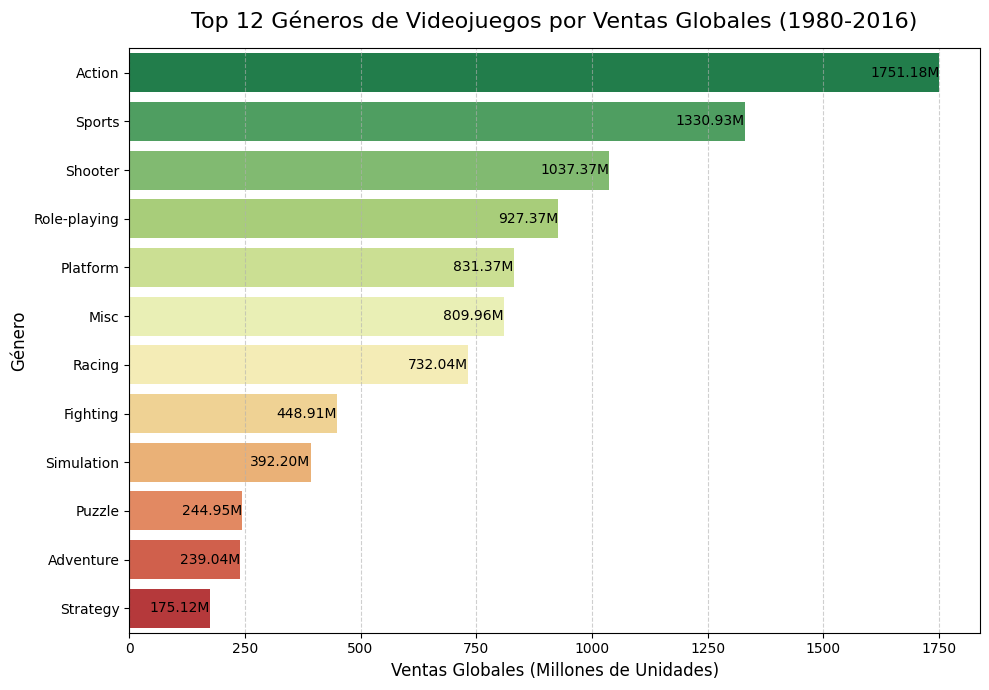

In [50]:
# Creando el grafico de barras(horizontal) con Seaborn
df_genre_sales['Genre'] = df_genre_sales['Genre'].str.capitalize()

palette = sns.color_palette("RdYlGn_r", n_colors=len(df_genre_sales))

plt.figure(figsize=(10, 7))

sns.barplot(
    x='Global_Sales',
    y='Genre',
    data=df_genre_sales,
    palette=palette,
    hue='Genre',
    legend=False
)

plt.title('Top 12 Géneros de Videojuegos por Ventas Globales (1980-2016)', fontsize=16, pad=15)
plt.xlabel('Ventas Globales (Millones de Unidades)', fontsize=12)
plt.ylabel('Género', fontsize=12)

# Mostrar el valor exacto de las ventas en cada barra (etiquetas de datos)
for index, row in df_genre_sales.iterrows():
    plt.text(
        row['Global_Sales'],
        index,
        f'{row["Global_Sales"]:.2f}M',
        color='black',
        ha="right",
        va="center"
    )

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##  Editor Más Consumido a Nivel Global

In [51]:
# Agrupar por "Publisher" y sumar por "Global_Sales"
publisher_sales = df_video_games_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False)

# Visualizar los datos de las empresas mas consumidas
top_10_publishers = publisher_sales.head(10).reset_index()
top_10_publishers.columns = ['Publisher', 'Global_Sales']
print("Las 10 empresas mas consumidas a nivel global:")
print(top_10_publishers)

Las 10 empresas mas consumidas a nivel global:
                      Publisher  Global_Sales
0                      nintendo       1786.56
1               electronic arts       1110.32
2                    activision        727.46
3   sony computer entertainment        607.50
4                       ubisoft        474.72
5          take-two interactive        399.54
6                           thq        340.77
7  konami digital entertainment        283.64
8                          sega        272.99
9            namco bandai games        254.09


### Grafico de consumo por empresa(Top 10)

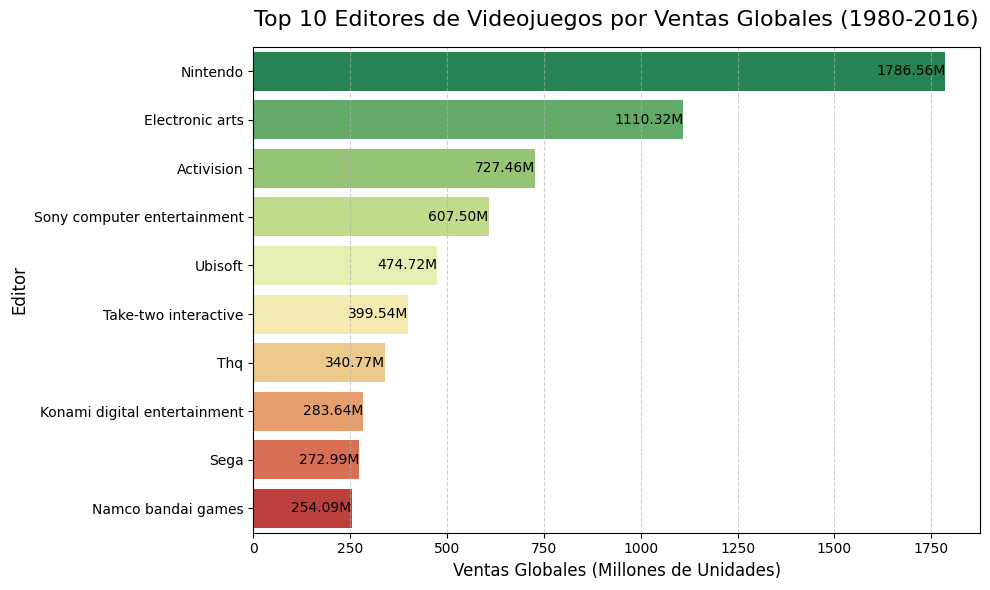

In [52]:
# Creando el grafico de barras(horizontal) con Seaborn
top_10_publishers['Publisher'] = top_10_publishers['Publisher'].str.capitalize()

palette_pub = sns.color_palette("RdYlGn_r", n_colors=len(top_10_publishers))

plt.figure(figsize=(10, 6))

# Crear el gráfico de barras HORIZONTAL con Seaborn
sns.barplot(
    x='Global_Sales',
    y='Publisher',
    data=top_10_publishers,
    palette=palette_pub,
    hue='Publisher',
    legend=False
)


plt.title('Top 10 Editores de Videojuegos por Ventas Globales (1980-2016)', fontsize=16, pad=15)
plt.xlabel('Ventas Globales (Millones de Unidades)', fontsize=12)
plt.ylabel('Editor', fontsize=12)

# Mostrar el valor exacto de las ventas en cada barra (etiquetas de datos)
for index, row in top_10_publishers.iterrows():
    plt.text(
        row['Global_Sales'],
        index,
        f'{row["Global_Sales"]:.2f}M',
        color='black',
        ha="right",
        va="center"
    )

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Ventas Global en años pares/impares

In [53]:
# Agrupar por "Year" y sumar por "Global_Sales"
df_sales_by_year = df_video_games_sales.groupby('Year')['Global_Sales'].sum().reset_index()

# Se filtra el rango historico
df_sales_by_year = df_sales_by_year[(df_sales_by_year['Year'] >= 1980) & (df_sales_by_year['Year'] <= 2016)]

# Se crea la columna para identificar los años impares de los pares
df_sales_by_year['Year_Type'] = df_sales_by_year['Year'].apply(lambda x: 'Even' if x % 2 == 0 else 'Odd')

# Visualizar los datos de los años de mas consumo
print("Ventas global por año:")
print(df_sales_by_year)

Ventas global por año:
    Year  Global_Sales Year_Type
0   1980         11.38      Even
1   1981         35.77       Odd
2   1982         28.86      Even
3   1983         16.79       Odd
4   1984         50.36      Even
5   1985         53.94       Odd
6   1986         37.07      Even
7   1987         21.74       Odd
8   1988         47.22      Even
9   1989         73.45       Odd
10  1990         49.39      Even
11  1991         32.23       Odd
12  1992         76.16      Even
13  1993         45.98       Odd
14  1994         79.17      Even
15  1995         88.11       Odd
16  1996        199.15      Even
17  1997        200.98       Odd
18  1998        256.47      Even
19  1999        251.27       Odd
20  2000        201.56      Even
21  2001        331.47       Odd
22  2002        395.52      Even
23  2003        357.85       Odd
24  2004        419.31      Even
25  2005        459.94       Odd
26  2006        621.12      Even
27  2007        611.13       Odd
28  2008        678.

### Grafico de tendencia en ventas por año

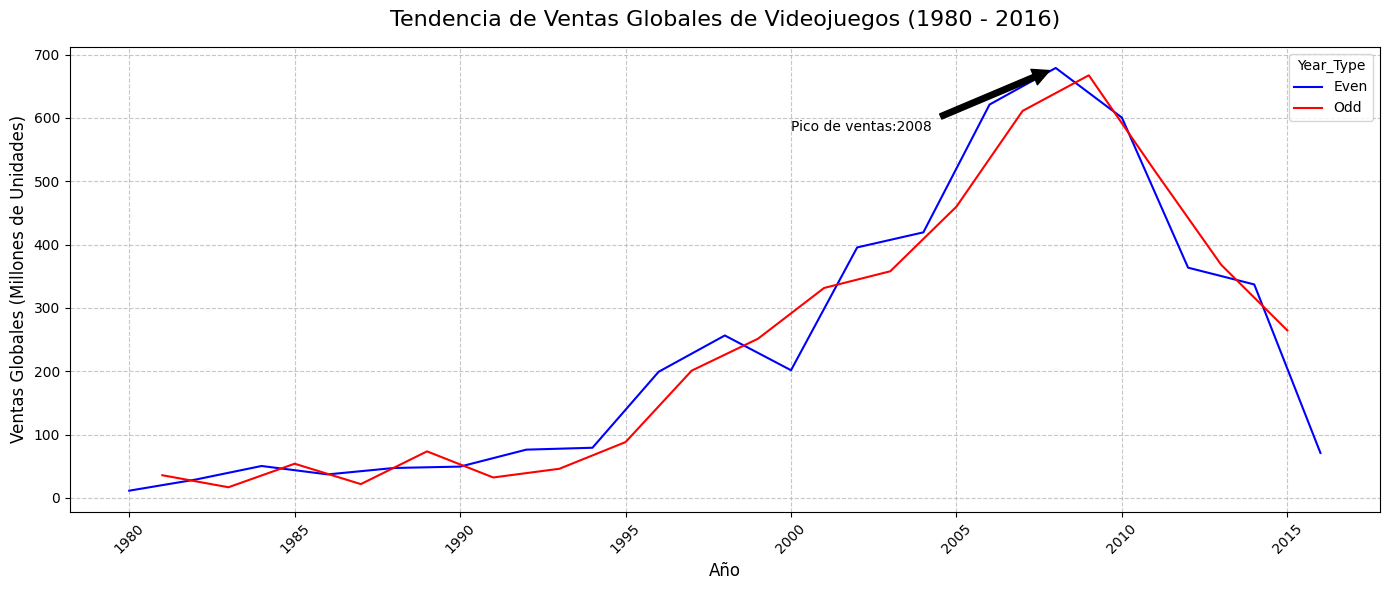

In [54]:
# Grafico de linea de tendencia
plt.figure(figsize = (14, 6))

sns.lineplot(
    x = 'Year',
    y = 'Global_Sales',
    data = df_sales_by_year,
    hue = 'Year_Type',
    palette = ['blue', 'red'],
    legend = 'full'
)

plt.title('Tendencia de Ventas Globales de Videojuegos (1980 - 2016)', fontsize = 16, pad = 15)
plt.xlabel('Año', fontsize = 12)
plt.ylabel('Ventas Globales (Millones de Unidades)', fontsize = 12)
plt.xticks(rotation = 45)

# Anotando el pico clave en la linea
peak_year = df_sales_by_year.loc[df_sales_by_year['Global_Sales'].idxmax()]

plt.annotate(
    f'Pico de ventas:{int(peak_year['Year'])}',
    xy = (peak_year['Year'], peak_year['Global_Sales']),
    xytext = (peak_year['Year'] - 8, peak_year['Global_Sales'] - 100),
    arrowprops = dict(facecolor = 'black', shrink = 0.05)
)

plt.grid(True, linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

## La consola dominante en periodos de años

In [55]:
# Definir los años
min_year = int(df_video_games_sales['Year'].min())
max_year = int(df_video_games_sales['Year'].max())
print(f"Periodo de años: {min_year} - {max_year}")

# Creando rangos de 5 años
bins = range(min_year, max_year + 5, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Creando la columna "Period"
df_video_games_sales['Period'] = pd.cut(df_video_games_sales['Year'], bins = bins, labels = labels, right = False)

# Agrupando "Period" con "Platform"
platform_period_sales = df_video_games_sales.groupby(['Period', 'Platform'])['Global_Sales'].sum().reset_index()

# Encontrando el ganador entre las consolas en cada periodo
dominant_platform = platform_period_sales.loc[platform_period_sales.groupby('Period')['Global_Sales'].idxmax()]

# Visualizar el resultado
print("\nConsola Dominante por Periodo (5 años): ")
print(dominant_platform)


Periodo de años: 1980 - 2020

Consola Dominante por Periodo (5 años): 
        Period Platform  Global_Sales
0    1980-1984     2600         82.11
42   1985-1989      nes        162.47
85   1990-1994     snes        150.44
108  1995-1999       ps        580.83
140  2000-2004      ps2        807.01
180  2005-2009      wii        694.38
203  2010-2014      ps3        581.63
235  2015-2019      ps4        154.58


### Grafico de periodo de tiempo para cada consola

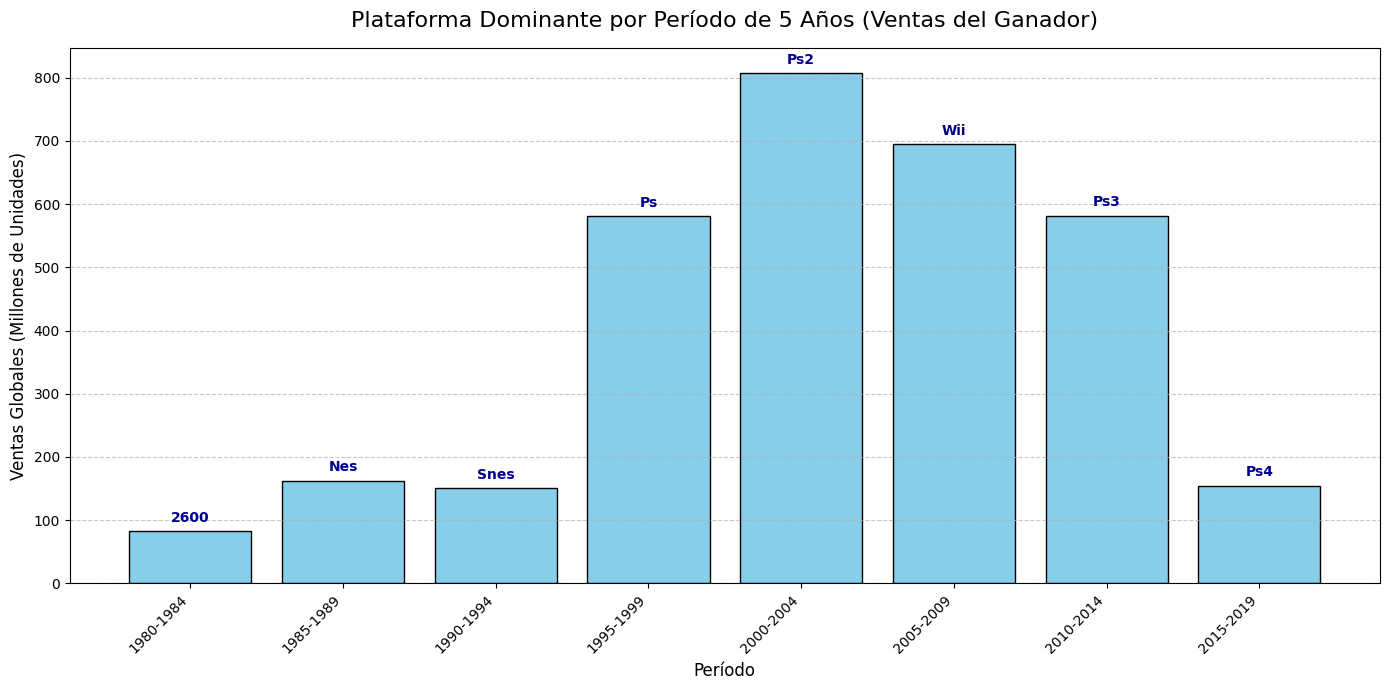

In [56]:
# Preparación de Datos
dominant_platform = dominant_platform.sort_values(by='Period')

# Extraemos las etiquetas y los valores para Matplotlib
periods = dominant_platform['Period'].astype(str).tolist()
sales = dominant_platform['Global_Sales'].tolist()
platforms = dominant_platform['Platform'].str.capitalize().tolist()

colors = ['skyblue'] * len(periods)


# Creación del gráfico
plt.figure(figsize=(14, 7))

plt.bar(
    periods,
    sales,
    color=colors,
    edgecolor='black'
)

for i, (platform_name, sale_value) in enumerate(zip(platforms, sales)):

    plt.text(
        i,
        sale_value + 10,
        platform_name,
        ha='center',
        va='bottom',
        fontsize=10,
        color='darkblue',
        weight='bold'
    )

plt.title('Plataforma Dominante por Período de 5 Años (Ventas del Ganador)', fontsize=16, pad=15)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Ventas Globales (Millones de Unidades)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Región con Mayor Consumo cada 5 años

In [57]:
# Agrupar y sumar ventas por región
regional_period_sales = df_video_games_sales.groupby('Period')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum().reset_index()

# 2. Reformatear el DataFrame para la visualización (Formato "Largo")
# Convertimos las columnas NA_Sales, EU_Sales, JP_Sales en una sola columna llamada 'Region'
regional_sales_melt = pd.melt(regional_period_sales,
                              id_vars = 'Period',
                              value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales'],
                              var_name = 'Region',
                              value_name = 'Sales')

print("Ventas Regionales por Período:")
print(regional_sales_melt.head())

Ventas Regionales por Período:
      Period    Region   Sales
0  1980-1984  NA_Sales  111.95
1  1985-1989  NA_Sales  123.71
2  1990-1994  NA_Sales  115.36
3  1995-1999  NA_Sales  460.75
4  2000-2004  NA_Sales  900.84


### Gráfico sobre la Venta Global por Región

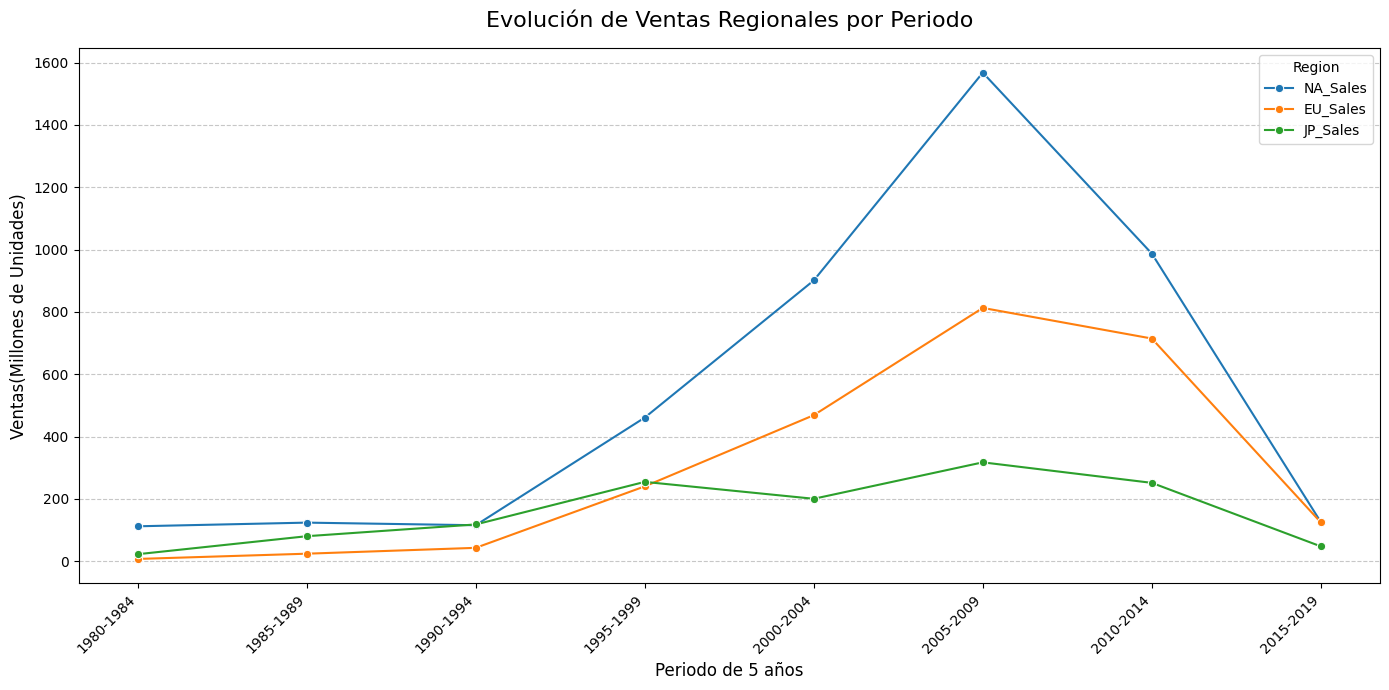

In [58]:
# Creando el grafico
plt.figure(figsize = (14, 7))

sns.lineplot(
    x = 'Period',
    y = 'Sales',
    hue = 'Region',
    data = regional_sales_melt,
    marker = 'o',
    dashes = False
)

plt.title('Evolución de Ventas Regionales por Periodo', fontsize = 16, pad = 15)
plt.xlabel('Periodo de 5 años', fontsize = 12)
plt.ylabel('Ventas(Millones de Unidades)', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')

plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

## Ventas Regionales Total

In [59]:
# Creando la suma de cada región
total_na = df_video_games_sales['NA_Sales'].sum()
total_eu = df_video_games_sales['EU_Sales'].sum()
total_jp = df_video_games_sales['JP_Sales'].sum()
total_sales_global = total_eu + total_jp + total_na

# Haciendo el dataframe
df_regional_sales_contribution = pd.DataFrame({
    'Region': ['North America(NA)', 'Europe(EU)', 'Japan(JP)'],
    'Sales': [total_na, total_eu, total_jp]
})

# Armando el porcentaje
df_regional_sales_contribution['Percentage'] = (df_regional_sales_contribution['Sales'] / total_sales_global) * 100

# Visualización del resultado
print("Ventas totales por region: ")
print(df_regional_sales_contribution)

Ventas totales por region: 
              Region    Sales  Percentage
0  North America(NA)  4392.95   54.113031
1         Europe(EU)  2434.13   29.983986
2          Japan(JP)  1291.02   15.902982


### Gráfica de las ventas totales por region

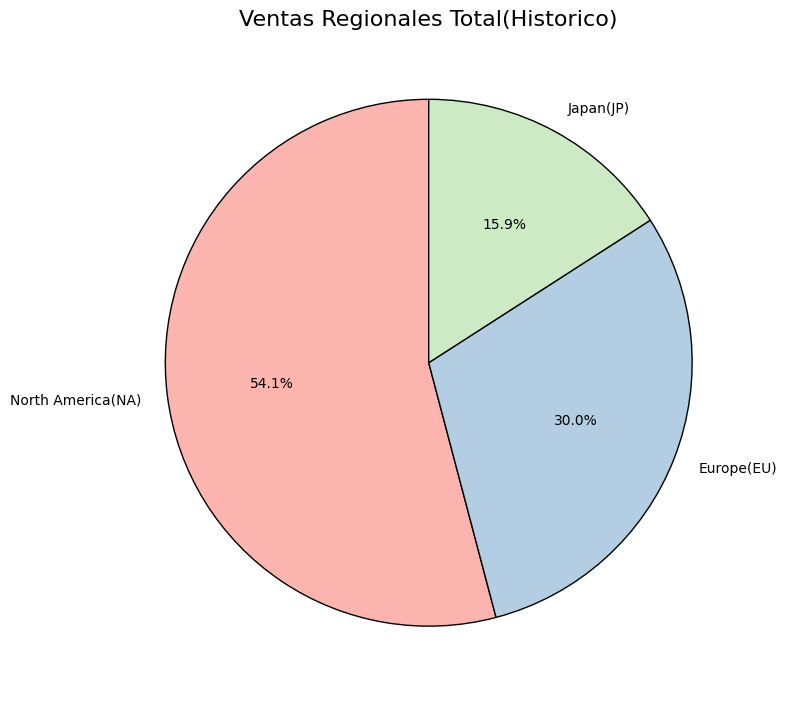

In [60]:
# Creando la grafica
plt.figure(figsize = (8, 8))

plt.pie(
    df_regional_sales_contribution['Percentage'],
    labels = df_regional_sales_contribution['Region'],
    autopct = '%1.1f%%',
    startangle = 90,
    colors = sns.color_palette('Pastel1'),
    wedgeprops = {'edgecolor': 'black'}
)

plt.title("Ventas Regionales Total(Historico)", fontsize = 16)
plt.tight_layout()
plt.show()

## La plataforma dominante en cada region

In [61]:
# Creando las variables
df_regional_platform_contribution = df_video_games_sales.groupby(['Period', 'Platform'])[['NA_Sales','EU_Sales','JP_Sales']].sum().reset_index()

# Armando la función
def get_dominant_platform(df, sales_column):
  return df.loc[df.groupby('Period')[sales_column].idxmax()].rename(columns = {'Platform': f'{sales_column}_Winner'})

# Encontrando el ganador en cada region
na_winner = get_dominant_platform(df_regional_platform_contribution, 'NA_Sales')
eu_winner = get_dominant_platform(df_regional_platform_contribution, 'EU_Sales')
jp_winner = get_dominant_platform(df_regional_platform_contribution, 'JP_Sales')

# Combinar los resultados para la visualización
regional_dominance_platform = pd.merge(na_winner[['Period', 'NA_Sales_Winner']], eu_winner[['Period', 'EU_Sales_Winner']], on = 'Period', how = 'outer')
regional_dominance_platform = pd.merge(regional_dominance_platform,  jp_winner[['Period', 'JP_Sales_Winner']], on = 'Period', how = 'outer')

# Visualizacion de los datos
print("Plataforma dominante por region")
print(regional_dominance_platform)

Plataforma dominante por region
      Period NA_Sales_Winner EU_Sales_Winner JP_Sales_Winner
0  1980-1984            2600            2600             nes
1  1985-1989             nes             nes             nes
2  1990-1994            snes            snes            snes
3  1995-1999              ps              ps              ps
4  2000-2004             ps2             ps2             ps2
5  2005-2009             wii             wii              ds
6  2010-2014            x360             ps3             3ds
7  2015-2019             ps4             ps4             3ds


### Grafico de dominio de plataformas por region

In [62]:
# Preparando los datos usado anteriormente de forma manual
data = {
    'Period': ['1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019'],
    'NA_Sales_Winner': ['2600', 'nes', 'snes', 'ps', 'ps2', 'wii', 'x360', 'ps4'],
    'EU_Sales_Winner': ['nes', 'nes', 'snes', 'ps', 'ps2', 'wii', 'ps3', 'ps4'],
    'JP_Sales_Winner': ['nes', 'nes', 'snes', 'ps2', 'ds', 'ds', '3ds', '3ds']
}

regional_dominance_platform = pd.DataFrame(data).set_index('Period')

#Colores para cada consola
color_map = {
    'nes': '#3498db',   # Azul
    '2600': '#9b59b6',  # Violeta
    'snes': '#2ecc71',  # Verde
    'ps': '#f1c40f',    # Amarillo
    'ps2': '#e67e22',   # Naranja
    'wii': '#e74c3c',   # Rojo
    'x360': '#34495e',  # Gris Oscuro
    'ps3': '#1abc9c',   # Turquesa
    'ps4': '#2c3e50',   # Negro/Gris muy oscuro
    'ds': '#c0392b',    # Granate
    '3ds': '#7f8c8d'    # Gris
}

cell_text = regional_dominance_platform.values.tolist()
row_labels = regional_dominance_platform.index.tolist()
col_labels = ['North America(NA)', 'Europe(EU)', 'Japan(JP)']

cell_colors = []
for row in cell_text:
    row_colors = [color_map.get(platform, '#ecf0f1') for platform in row]
    cell_colors.append(row_colors)

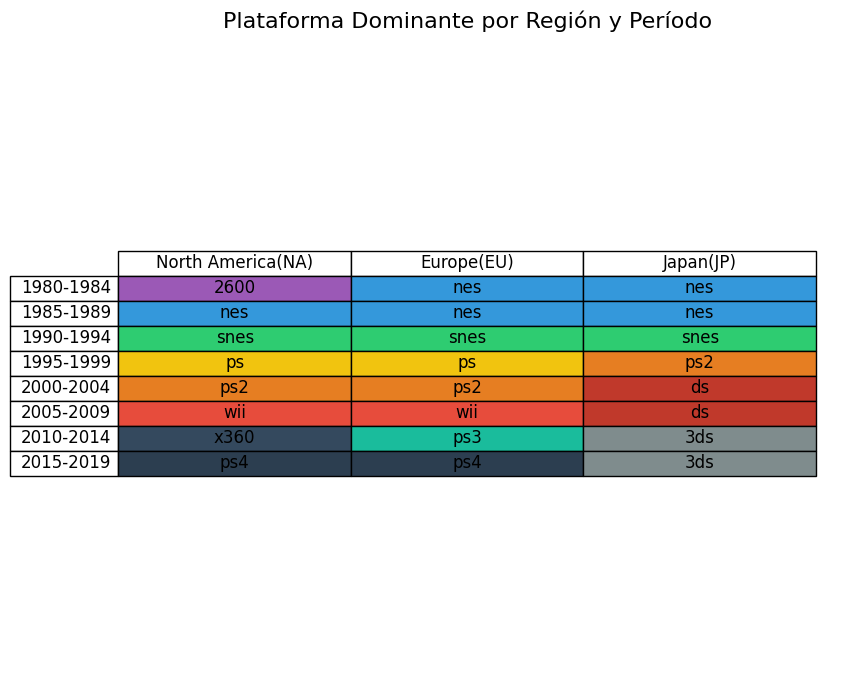

In [63]:
# Creando el grafico
fig, ax = plt.subplots(figsize=(10, 8))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

tabla = ax.table(
    cellText = cell_text,
    cellColours = cell_colors,
    rowLabels = row_labels,
    colLabels = col_labels,
    loc = 'center',
    cellLoc = 'center',
    colWidths = [0.2, 0.2, 0.2]
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.5, 1.5)

ax.set_title('Plataforma Dominante por Región y Período', fontsize=16, pad=20)

plt.show()

## Conectando con datos actuales

In [66]:
!pip install pytrends

### Grafico de lineas usando datos de Google Trends

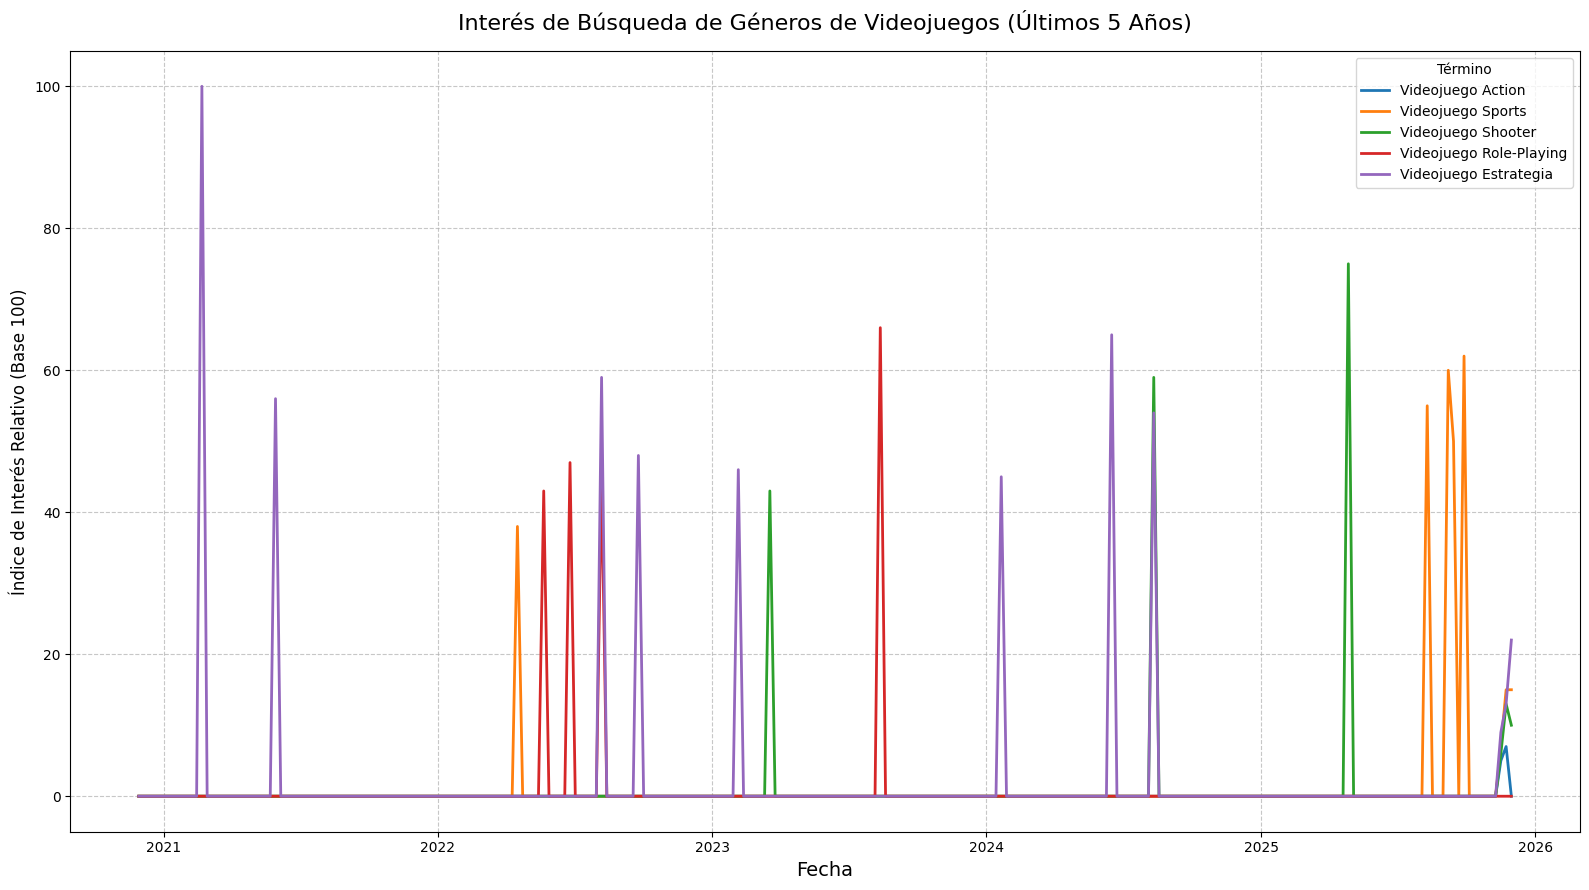

In [73]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='es-ES', tz=360)

keywords = ['Videojuego Action', 'Videojuego Sports', 'Videojuego Shooter', 'Videojuego Role-Playing', 'Videojuego Estrategia']
timeframe = 'today 5-y'
geo = ''

try:
    pytrends.build_payload(keywords, cat=0, timeframe=timeframe, geo=geo)
    interest_over_time_df = pytrends.interest_over_time()

except Exception as e:
    print(f"Error al obtener datos de Google Trends: {e}")
    interest_over_time_df = pd.DataFrame()

if not interest_over_time_df.empty:
    df_trends = interest_over_time_df.drop(columns=['isPartial'], errors='ignore')
    df_trends = df_trends.reset_index()

    plt.figure(figsize=(16, 9))
    df_trends_melted = df_trends.melt('date', var_name='Término', value_name='Interés Relativo')

    sns.lineplot(
        x='date',
        y='Interés Relativo',
        hue='Término',
        data=df_trends_melted,
        linewidth=2
    )

    plt.title('Interés de Búsqueda de Géneros de Videojuegos (Últimos 5 Años)', fontsize=16, pad=15)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Índice de Interés Relativo (Base 100)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No se pudo generar el gráfico de Google Trends.")

### 🎯 Conclusión Ejecutiva: Tendencia de Mercado y Éxito Garantizado
El análisis histórico de ventas (1980-2016) y la validación con tendencias de búsqueda actuales (Google Trends 2020-2025) señalan una dirección clara para el éxito en el mercado de videojuegos.

**Recomendación de Alto Impacto:**

Priorizar el género Acción/Shooter. Los datos confirman que los géneros de Acción y Shooter (complementario al Action) representan el núcleo del mercado, con una dominancia histórica de ventas inigualable y un interés de búsqueda consistentemente superior en la actualidad, superando a todos los demás géneros, incluidos los Deportes.

Para asegurar el éxito de un nuevo título, la estrategia debe centrarse en la producción de alto valor en el género Acción/Shooter, ya que es la categoría con la base de demanda más grande y estable a nivel global. Los géneros secundarios como Role-Playing y Estrategia mantienen nichos fieles y son excelentes candidatos para títulos de presupuesto medio o para incorporar como mecánicas secundarias de monetización.